<a href="https://colab.research.google.com/github/bray22/CS-5254-Spring-2022-BenRay/blob/main/HOF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basketball Hall of Fame Predictor

**Background**

The Basketball Hall of Fame is an institution that honors the greatest NBA basketball players of all time. Located in Springfield, MA, the HOF includes over 400 of the most elite players from the last century.


**Project Description**

Using the statistics of current Hame of Fame inductees and current players, the goal of the project is to predict how likely a current NBA player is to be inducted into to the Basketball Hall of Fame. Players with statistics comparable to Hall of Fame inductees are considered a likely candidate for induction...


**Performance Metric**

The performance metric is player performance statistics.

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


12.94078947368421
47.938741974123836


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


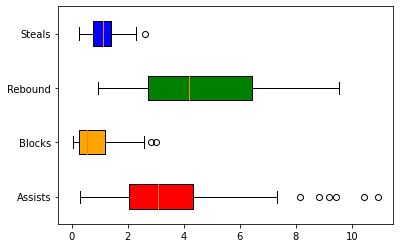

In [3]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

path="/content/drive/MyDrive/csv/seasons.csv";
df=pd.read_csv(path)

#average career span of HOF player
playerspan=df.groupby(['Player'])['Player'].count().mean()
print(playerspan)

#Box plot showing statistics min, max, average and skews
# Average point per game from player from player who score aggregate 
# points per game per season for best season
pts=df.groupby(['Player'])['PTS'].mean().round(0).astype('int')
maxPPG=pts.max()
meanPPG=pts.mean()
# max PPG
maxPPG.real
#average ppg
meanPPG.real
ppg = meanPPG / maxPPG
ppgPercent = ppg * 100

# Average DRB per game from player from player who score aggregate 
# DRB per season for best season
drb=df.groupby(['Player'])['DRB'].mean().dropna()
maxDRB=drb.max()
meanDRB=drb.mean()
# max DRB
maxDRB.real
#average DRB
meanDRB.real
drbp = meanDRB / maxDRB
drbPercent = drbp * 100
print(drbPercent)

# Average AST per game from player from player who score aggregate 
# AST per season for best season
ast=df.groupby(['Player'])['AST'].mean()
maxAST=ast.max()
meanAST=ast.mean()
# max DRB
maxAST.real
#average DRB
meanAST.real
astp = meanAST / maxAST
astPercent = astp * 100

# Average STL per game from player from player who score aggregate 
# STL per season for best season
stl=df.groupby(['Player'])['STL'].mean().dropna()
maxSTL=stl.max()
meanSTL=stl.mean()
# max DRB
maxSTL.real
meanSTL.real
stlp = meanSTL / maxSTL
stlPercent = stlp * 100

# Average BLK per game from player from player who score aggregate 
# BLK per season for best season
blk=df.groupby(['Player'])['BLK'].mean().dropna()
maxBLK=blk.max()
meanBLK=blk.mean()
# max BLK
maxBLK.real
#average BLK
meanBLK.real
blkp = meanBLK / maxBLK
blkPercent = blkp * 100

assists = ast
blocks = blk
rebounds = drb
steals = stl
 
box_plot_data=[assists,blocks,rebounds,steals]
box=plt.boxplot(box_plot_data,vert=0,patch_artist=True,labels=['Assists','Blocks','Rebound','Steals'],
            )
colors = ['red', 'orange', 'green', 'blue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
 
plt.show()

# Radar chart showing mean assists versus maximum assists
df = pd.DataFrame(dict(
    r=[astPercent, stlPercent, blkPercent, ppgPercent, drbPercent],
    theta=['Assists','Steals','Blocks',
           'Points', 'Rebounds']))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
fig.show()
